# Descriptive Statistics

this section consist of:

* Measure of Central Tendency
* Measure of Dispersion (Variability)
* Shape of The Data
* How descriptive Statistic used in Data Science

# Measure of Central Tendency

to describe a set of data by identifying the central position within that set of data, sometimes called measure of central location

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#showing the mean of 'sepal length' column
df['sepallength'].mean()

5.843333333333335

mean is the most basic measure of central tendency. it can be used in descrete and continous data, although most of then in continous data.


the mean has one disadvantage: it is particulary susceptible to the influence of outliers. taking the median would be a better measure of central tendency if in this situation. as the data becomes skewed the mean loses its ability to provide the best central location for the data because the skewed data is dragging it away from the typical value.

In [4]:
#showing the median of 'Sepal length' column
df['sepallength'].median()

5.8

median is the middle number on a sorted list of the data. the median is less affected by outliers and skewd data.

{'whiskers': [<matplotlib.lines.Line2D at 0x176ee980250>,
 'caps': [<matplotlib.lines.Line2D at 0x176ee980910>,
 'boxes': [<matplotlib.lines.Line2D at 0x176ee970eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x176ee980fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x176ee98b370>],
 'means': []}

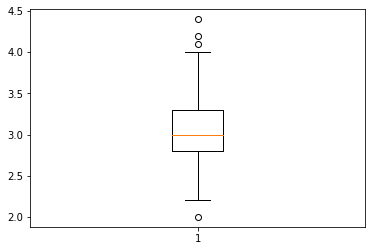

In [13]:
#this is how outliers looks like in the data. we can see outliers using box plot
plt.boxplot(df['sepalwidth'])

point in above and below the wisker are the outliers of the data in column 'sepal width'

In [14]:
df['sepallength'].mode()

0    5.0
dtype: float64

mode is the most frequent score in the dataset. visualize in a bar plot make it easier to read the most frequent score in the data set

<BarContainer object of 150 artists>

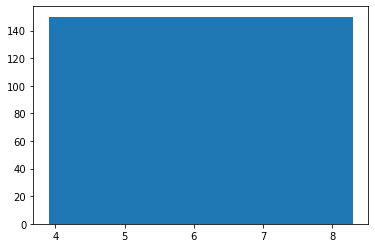

In [16]:
plt.bar(df['sepallength'], height = df['sepallength'].count())

In [17]:
#use this sytnax to show the description of the data
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#data shape
df.shape

(150, 5)

the shape of iris dataset consist of 150 rows and 5 columns

In [5]:
#checking if there are null values in the dataset
df.isna().any()

sepallength    False
sepalwidth     False
petallength    False
petalwidth     False
class          False
dtype: bool

there is no null values in the dataset

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Measure of Dispersion/Variability

measure whether the data values are tightly clustered or  spread out. to measure central tendency we can use mean, median, etc. here are the ways to measure variablity:

In [21]:
#standard Deviation
#using this syntax or using df.describe()
df['sepalwidth'].std()

0.4335943113621737

In [22]:
#Variance
import numpy as np

print(np.var(df['sepalwidth']))

0.1867506666666667


standard deviation is much easier to interper than the variance since it is on the same scale as the original data. but, both of them are sensitive to outliers since they based on the squared deviations. a robust measure of variability is the Median Absolute Deviation (MAD). like the median, MAD is not influenced by extreme values.

In [23]:
#MAD
from scipy import stats
stats.median_abs_deviation(df['sepalwidth'])

0.25

array([[<AxesSubplot:title={'center':'sepallength'}>,
        <AxesSubplot:title={'center':'sepalwidth'}>],
       [<AxesSubplot:title={'center':'petallength'}>,
        <AxesSubplot:title={'center':'petalwidth'}>]], dtype=object)

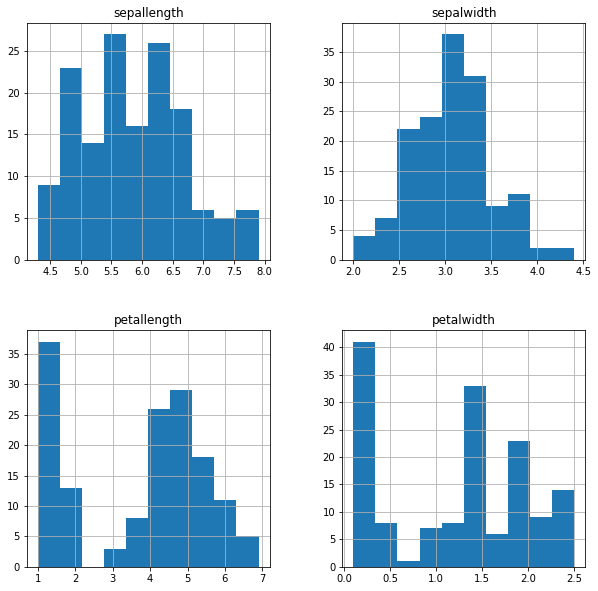

In [7]:
df.hist(figsize = (10,10))

In [24]:
#Range: the difference between the largest and smallest number
small = min(df['sepalwidth'])
large = max(df['sepalwidth'])

range_sepallength = large-small
print(range_sepallength)

2.4000000000000004


the maximum and minimum values are useful to know and are helful in identifying outliers, but range is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data. to avoid the sensitivity to outliers, we can look at the range of the data after dropping value from each end.

In [25]:
#Interquartile range (IQR)
IQR = df['sepalwidth'].quantile(0.75) - df['sepalwidth'].quantile(0.25)
print(IQR)

0.5


<AxesSubplot:xlabel='class', ylabel='sepalwidth'>

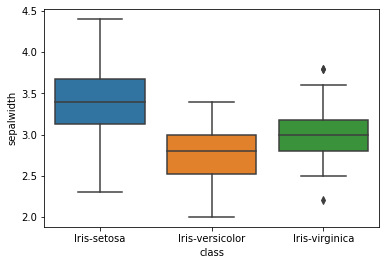

In [28]:
sns.boxplot(x= 'class', y = 'sepalwidth', data = df)

# Shape of The Data

Skewness is a measure of asymmetry of a distribution.

* in a normal ditribution, the mean divides the curve symmetrically into two equal parts at the median and the value of skewness is zero
* when a distribution is asymmetrical the tail of the ditribution is skewed to one side to the right or to the left
* when the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve

Important Notes:
* -0.5 - 0.5 = data fairly symmetrical
* -1 and -0.5 or 0.5 - 1 = moderately skewed
* less than -1 or greater than 1 = highly skewed

In [4]:
df.skew(axis=0)

sepallength    0.314911
sepalwidth     0.334053
petallength   -0.274464
petalwidth    -0.104997
dtype: float64

this data lies between -0.5 - 0.5 which fairly symmetric

In [5]:
titanic_dataset = pd.read_csv("titanic.csv")

In [6]:
titanic_dataset.skew(axis=0)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Kurtosis (excess kurtosis) measure quantify shape of a distribution. kurtosis determine the volume of the outlier or dtermines the heaviness of the distribution tails.

* leptokurtic distribution(kurtosis>3) = the distribution is tall and thin. the values are near the mean or at the extremes
* platykurtic distribution(kurtosis<3) = the distribution is flat and the values are moderately spread out
* mesokurtic distribution(kurtosis=3) = the ditribution looks more close to a normal distribution

Important Note:
* skewness measure the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails
* it is the sharpness of the peak of a frequency distribution curve. it is actually measure the outliers present in the idstribution
* High kurtosis indicate data has heavy outliers
* low kurtosis indicate data has lack outliers
* (+) kurtosis value means pointy
* (-) kurtosis value means flat

In [7]:
df.kurt(axis = 0)

sepallength   -0.552064
sepalwidth     0.290781
petallength   -1.401921
petalwidth    -1.339754
dtype: float64

all of the kurtosis are below 3 whic means the distribution of each features are flat and the values are moderately spread out and all of the has lack outliers since the data has all low kurtosis. feature 'sepal width' is the only positive value whic mean it is pointy as visualization show below

Generally, metrics are nor used to measure skewness and kurtosis, instead these are discovered through visual display

<AxesSubplot:ylabel='Density'>

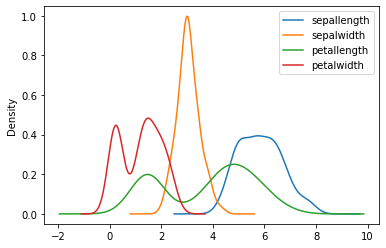

In [10]:
df.plot(kind = 'density')